In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

## Graphical Representation

In [2]:
import graphviz as gv

The function `toDot` takes four arguments:
- `A` is an array of natural numbers of length $n$,
- `f` is a natural number such that $0 \leq f < n$ holds,
- `g` is a natural number such that $f < g < n$ holds,
- `u` is a natural number such that $0 \leq u < n$ holds.
  This argument is optional.

The function returns a graphical representation of the array `A` as a heap. 
This graphical representation is stored as a directed graph with an encoding suitable for `graphviz`. 

The part `A[0:g]` is represented as a binary tree, while the part `A[g:]` is represented
as a list.  Furthermore, all indexes in the range `A[k:g]` satisfy the heap condition.  The nodes in the range `[0:k-1]`
are colored red.  If `u` is set, the node `A[u]` is colored orange.

In [3]:
def heapToDot(A):
    n   = len(A)
    dot = gv.Digraph(node_attr={'shape': 'record'})
    for k, (p, o) in enumerate(A):
        if str(p) != str(o):
            dot.node(str(k), label='{' + str(p) + '|' + str(o) + '|' + str(o.mIndex) + '}', style='rounded')
        else:
            dot.node(str(k), label='{' + str(p) + '|' + str(k) + '}', style='rounded')
    for k in range(0, n // 2):
        if 2 * k + 1 < n:
            dot.edge(str(k), str(2 * k + 1))
        if 2 * k + 2 < n:
            dot.edge(str(k), str(2 * k + 2))
    return dot

# Priority Queues implemented as Heaps

## Auxiliary Methods

The function call `swap(A, i, j)` takes an array `A` and  two indexes `i` and `j` and exchanges the elements at these indexes.

In [4]:
def swap(A, i, j):
    pi, oi = A[i]
    pj, oj = A[j] 
    oi.mIndex = j
    oj.mIndex = i
    A[i] = pj, oj
    A[j] = pi, oi

The function `ascend` takes two arguments:
- `A` is an array that is represented as a list in *Python*.
- `k` is an index into the array `A`.

   Therefore we have $k \in \bigl\{0, \cdots, \texttt{len}(A)-1\bigr\}$.

The array `A` represents a *heap*.  However, the <em style="color:blue">heap condition</em> might be violated 
at index `k`: It might be the case that the element at this index is to small and needs to rise to the top
of the heap.  The function `ascend` will fix the heap condition and will rise the element `A[k]` as much 
as is necessary to turn `A` into a heap.

In [5]:
def ascend(A, k):
    while k > 0:
        p = (k - 1) // 2
        if A[k] < A[p]:
            swap(A, p, k)
            k = p
        else:
            return k
    return 0

The function `descend(A)` takes one argument `A` where `A` is an array that is organized as a heap,
but possibly has its heap condition violated at its root, i.e. at index `0`.  The
purpose of the procedure `descend` is to restore the heap condition at the root.
We initialize a variable `k` as `0` and the `while`-loop proceeds as follows: 
- We compute the index `j` of the left subtree below index `k`.
- We check whether there also is a right subtree at position `j+1`.
  
  This is the case if `j + 1 <= n` where `n = len(A) - 1`.  
- If the heap condition is violated at index `k`, we exchange the element at  position `k` 
  with the child that has the higher priority, i.e. the child that is smaller. 
- Next, we check in line 9 whether the heap condition is violated at index `k`.  
  If the heap condition is satisfied, there is nothing left to do and the procedure returns.  
  
- Otherwise, the element at position `k` is swapped with
  the element at position `j`.  
  
  Of course, after this swap it is possible that the heap condition is
  violated at position `j`.  Therefore,  `k` is set to `j` and the `while`-loop continues
  as long as the node at position `k` has at least one child, i.e. as long as 
  `2 * k + 1 <= n`.

In [6]:
def descend(A):
    n = len(A) - 1
    k = 0
    while 2 * k + 1 <= n:
        j = 2 * k + 1
        if j + 1 <= n and A[j] > A[j + 1]:
            j += 1
        if A[k] < A[j]:
            return
        swap(A, k, j)
        k = j

## Implementing the API

The function `insert(H, x)` takes two arguments:
- `H` is a heap that is represented as an array.
- `x` is a pair of the form `(p, o)` where
  - `p` is a natural number interpreted as a priority.  The smaller the number, the higher the priority.
  - `o` is an object.  
  
    Every object `o` knows its index in the heap via the member variable `o.mIndex`.
    
This method inserts the pair `x` into the heap `H`.  Furthermore, the object `o` is modified so that it remembers
the index at which it is stored in `H`.  This is done by storing this index in `o.mIndex`.

In [7]:
def insert(H, x):
    n = len(H)
    H.append(x)
    _, o = x
    o.mIndex = n
    k = ascend(H, n)
    o.mIndex = k

The function `elevate(H, o, p)` takes three arguments.
- `H` is a list that is organized as a heap.
- `o` is an object that occurs in the heap `H` at index `o.mIndex`, i.e. we have `H[o.mIndex] = p_old, o.mIndex`,
  where `p_old` is the priority that was used when `o` was stored in `H`.
- `p` is the new priority of `o` in `H`.  This priority must be higher than the priority `p_old`, i.e. we must have `p < p_old`.

The function call `elevate(H, o, p)` elevates the priority of the object `o` to `p` in `H` and takes care that `o` is stored further up in `H` 
so that the heap property of `H` is maintained.

In [8]:
def elevate(H, o, p):
    k = o.mIndex
    H[k] = (p, o)
    ascend(H, k)

In [9]:
def remove(H):
    pFirst, oFirst = H[0]
    pLast , oLast  = H[-1]
    oLast.mIndex   = 0
    H[0]           = pLast, oLast
    H.pop(-1)
    descend(H)
    return pFirst, oFirst

## Testing

In [10]:
class Node:
    def __init__(self, value):
        self.mValue = value
        
    def __hash__(self):
        return hash(self.mValue)
    
    def __repr__(self):
        try:
            return 'Node(' + str(self.mValue) + ':' + str(self.mIndex) + ')'
        except AttributeError:
            return 'Node(' + str(self.mValue) + ')'
        
    def __str__(self):
        return str(self.mValue)
    
    def __eq__(self, other):
        if other == None:
            return False
        return self.mValue == other.mValue
    
    def __lt__(self, other):
        return self.mValue < other.mValue

In [11]:
import string

In [12]:
def demo1():
    L = [ (i, Node(c)) for i, c in enumerate(string.ascii_lowercase) ]
    _, w = L[22] 
    H = []
    for i, x in enumerate(L):
        insert(H, x)
    display(heapToDot(H))
    print('Elevating "w" to priority 2:')
    elevate(H, w, 2)
    display(heapToDot(H))

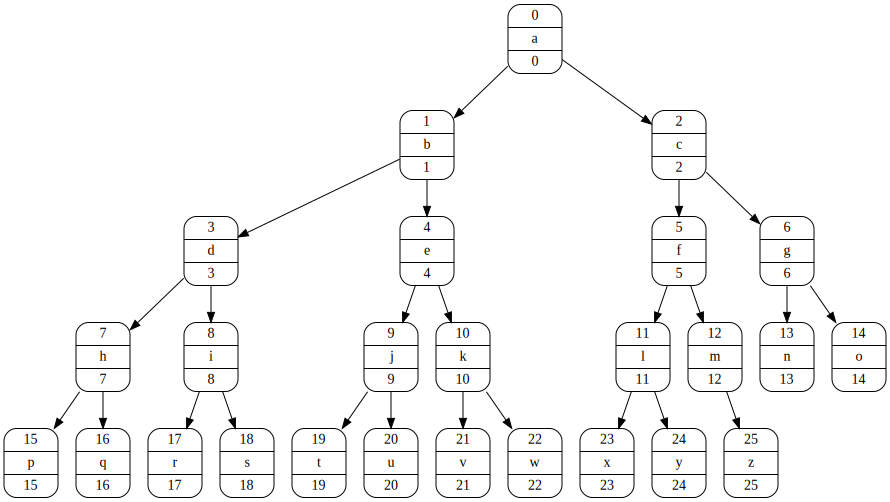

Elevating "w" to priority 2:


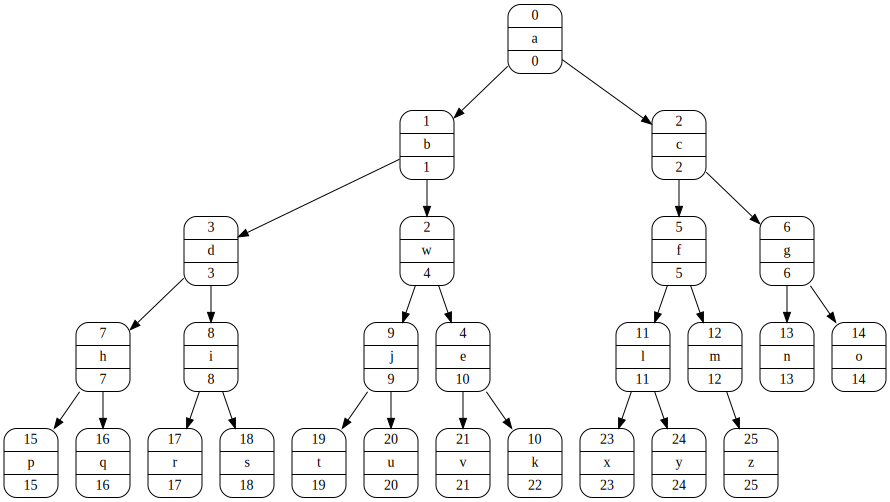

In [13]:
demo1()

In [14]:
import random as rnd

In [15]:
def heap_sort(L):
    H = []
    for x in L:
        insert(H, x)
    display(heapToDot(H))
    S = []
    while H != []:
        p, _ = remove(H)
        display(heapToDot(H))
        S.append(p)
    return S

In [16]:
def demo2():
    L = [ rnd.randrange(1, 200) for n in range(12) ]
    L = [ (n, Node(n)) for n in L ]
    print("L = ", L)
    S = heap_sort(L)
    print("S = ", S)

L =  [(173, Node(173)), (187, Node(187)), (180, Node(180)), (16, Node(16)), (60, Node(60)), (128, Node(128)), (181, Node(181)), (8, Node(8)), (186, Node(186)), (47, Node(47)), (101, Node(101)), (153, Node(153))]


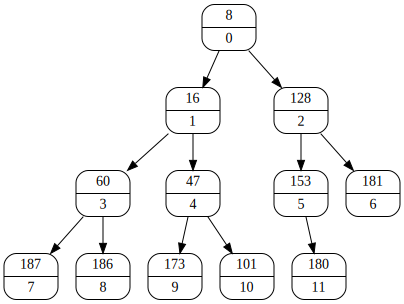

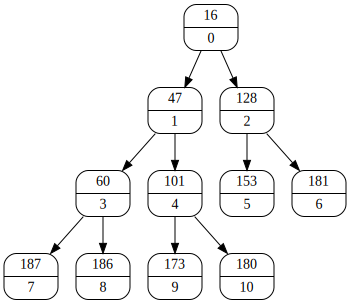

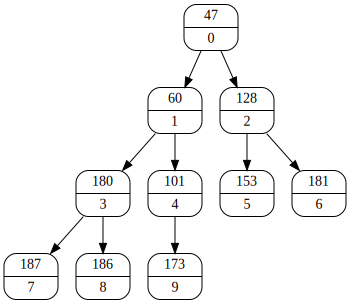

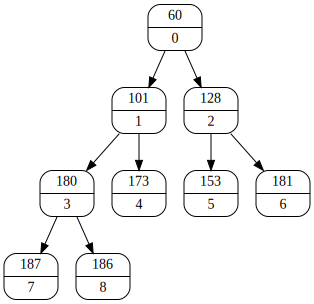

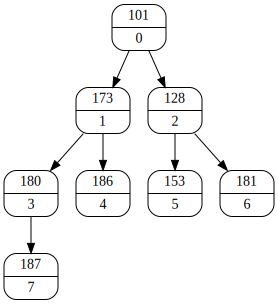

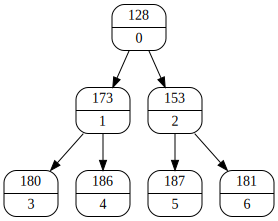

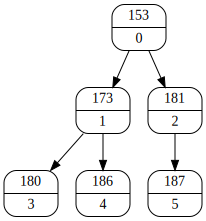

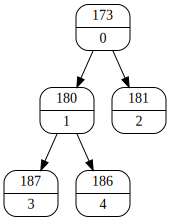

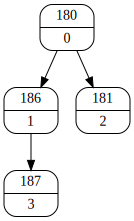

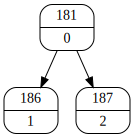

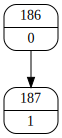

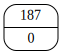

S =  [8, 16, 47, 60, 101, 128, 153, 173, 180, 181, 186, 187]


In [17]:
demo2()